Collaborative coding using GitHub
===========

Alexandre Perera Luna, Mónica Rojas Martínez

December 15th 2023


# Goal

The objective of this assignment is to construct a project through collaborative coding, showcasing an Exploratory Data Analysis (EDA) and a classification. To facilitate your understanding of GitHub, we will utilize code snippets from previous exercises, allowing you to focus on the process without concerns about the final outcome. The current notebook will serve as the main function in the project, and each participant is required to develop additional components and integrate their contributions into the main branch.


## Requirements

In order to work with functions created in other jupyter notebooks you need to install the package `nbimporter` using a shell and the following command:

<font color='grey'>pip install nbimporter</font> 

`nbimporter` allows you to import jupyter notebooks as modules. Once intalled and imported, you can use a command like the following to import a function called *fibonacci* that is stored on a notebook *fibbo_func* in the same path as the present notebook:

<font color='green'>from</font> fibbo_func <font color='green'>import</font> fibbonaci  <font color='green'>as</font> fibbo



In [1]:
## Modify this cell by importing all the necessary modules you need to solve the assigmnent. Observe that we are importing
## the library nbimporter. You will need it for calling fuctions created in other notebooks. 
import nbimporter
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


from function_scat_plt import *
from function_renamevars import *
from function_normalize import *
from function_group_and_average import *
from function_anotate_stats import *

pd.set_option('display.max_columns', None)


In [2]:
# Here is an example of invoking the Fibonacci function, whisch should be located in the same directory as the main:
from fibbo_func import fibbonaci as fibbo
fibbo(24)

46368

## Exercises
As an illustration of Git workflow, you will analyze the *Parkinson's* dataset, which has been previously examined in past assignments. Each team member has specific responsibilities that may be crucial for the progress of others. Make sure all of you organize your tasks accordingly. We've structured the analysis into modules to assist you in tracking your tasks, but feel free to deviate from it if you prefer.   
Please use Markdown cells for describing your workflow and expalining the findings of your work. 
Remember you need both, to modify this notebook and, to create additional functions outside. Your work will only be available for others when you modify and merge your changes.


In [3]:
# We will start by loading the parkinson dataset. The rest is up to you!
df = pd.read_csv('parkinsons.data', 
                 dtype = { # indicate categorical variables
                     'status': 'category'})
df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### 1. Cleaning and tidying the dataset

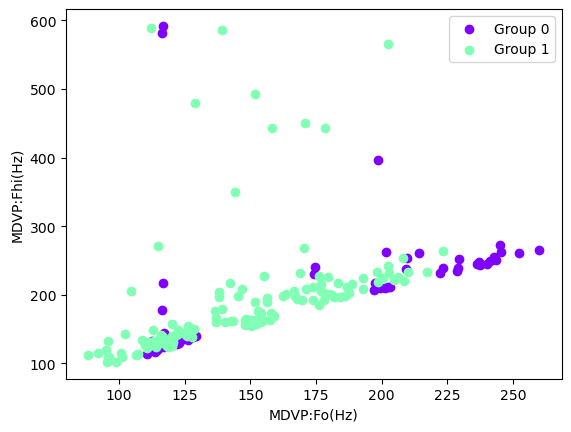

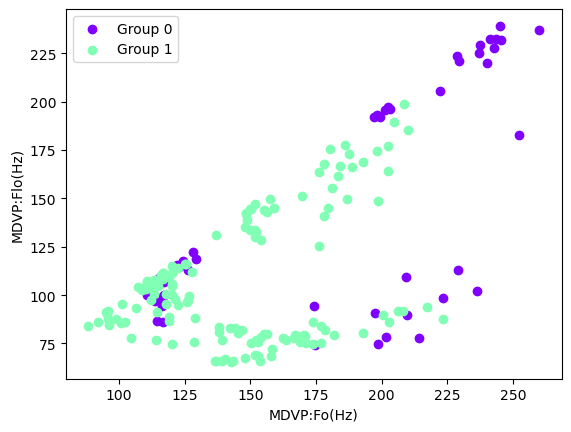

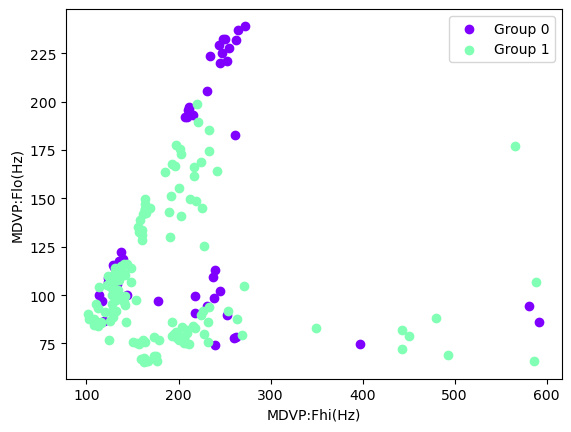

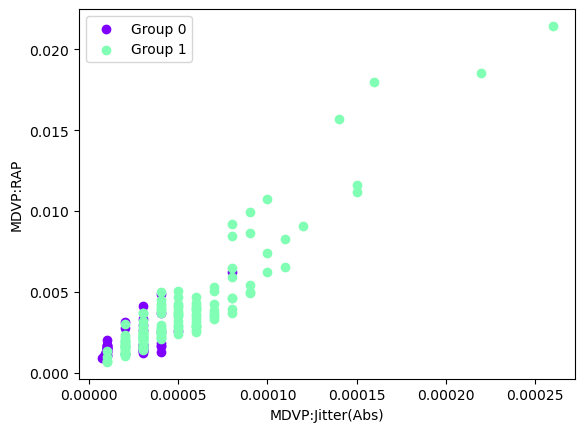

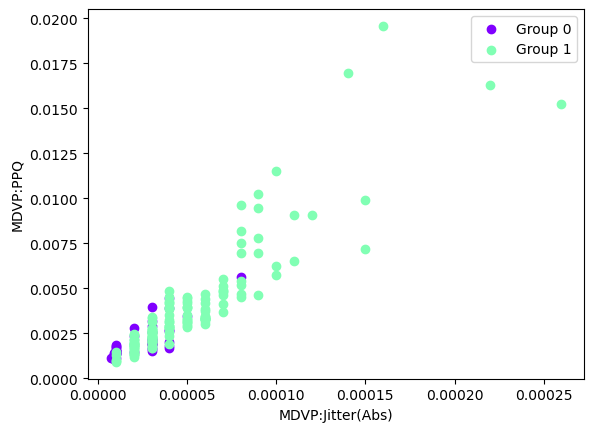

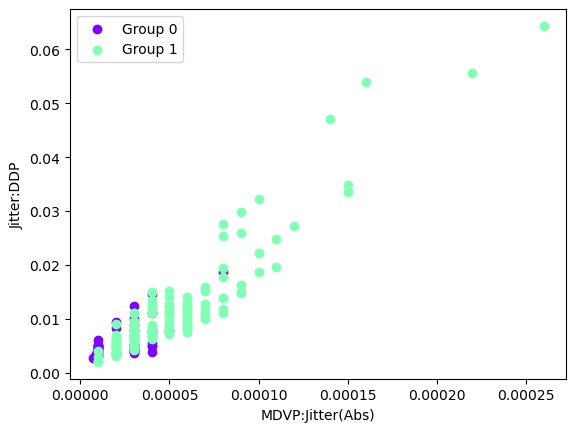

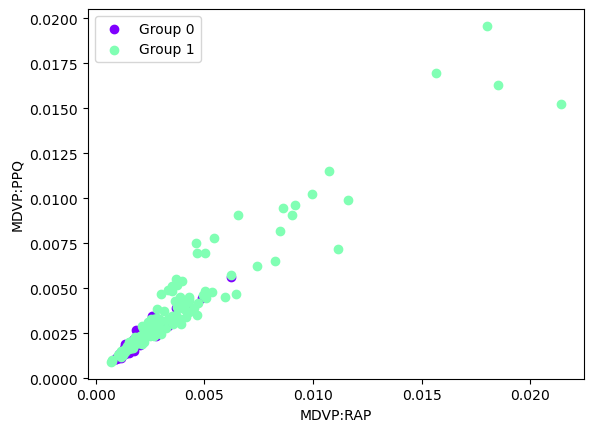

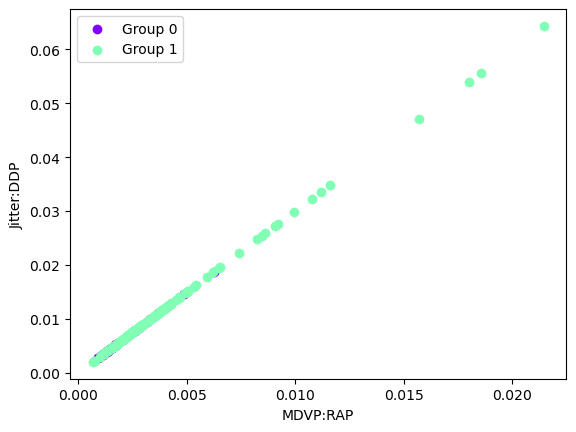

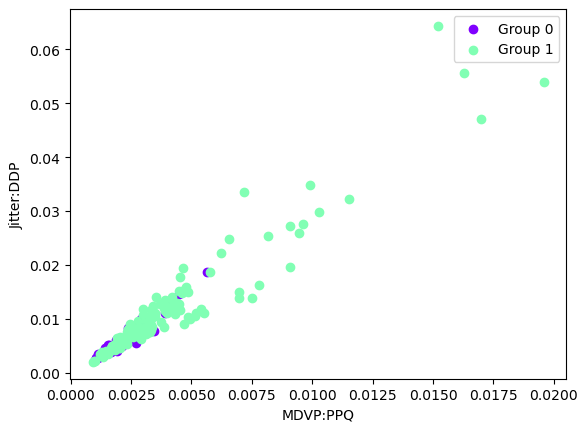

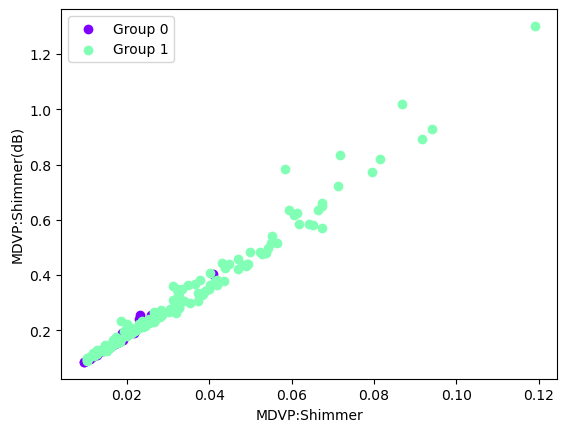

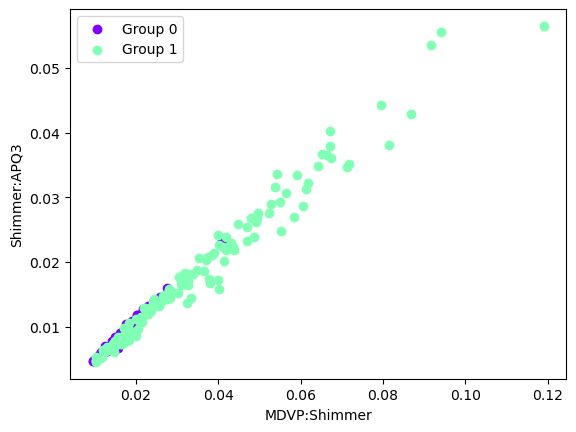

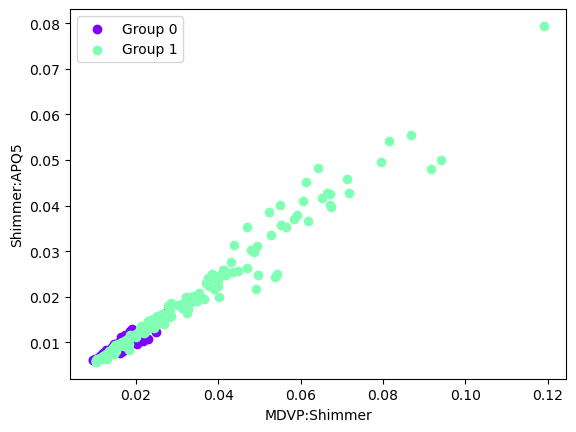

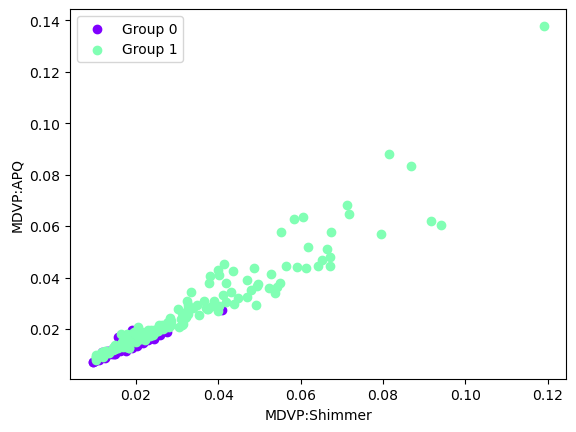

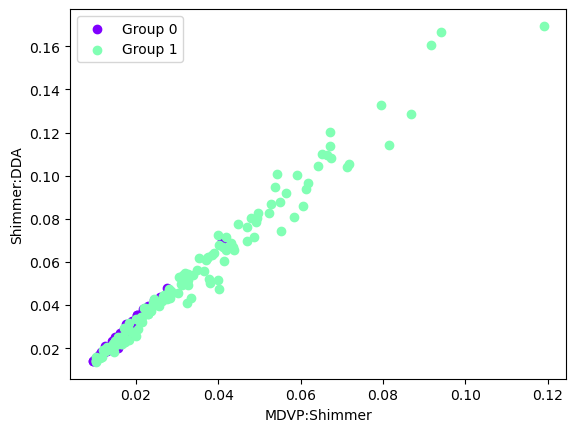

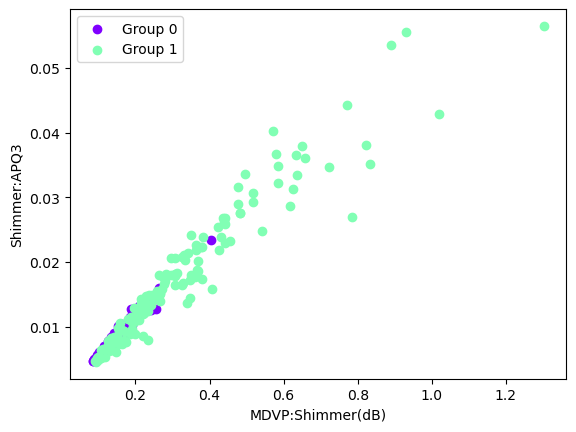

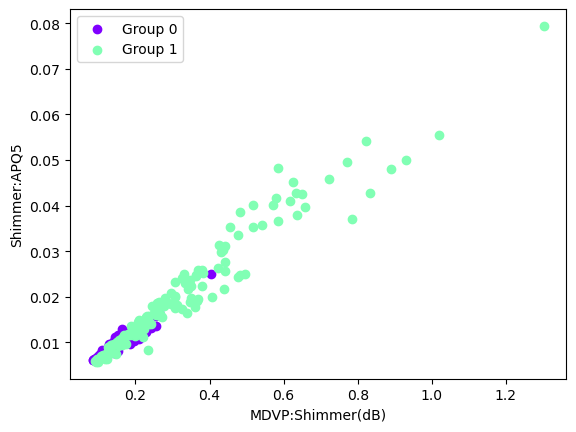

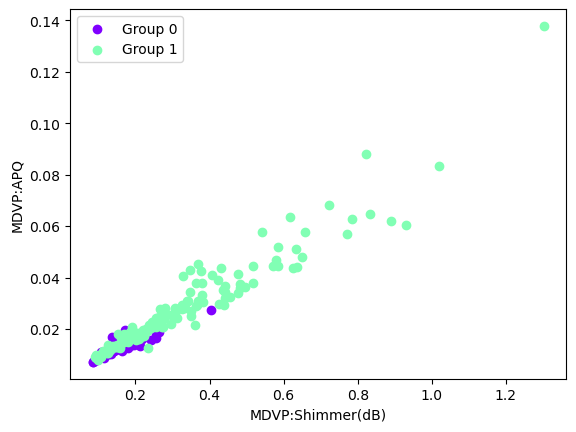

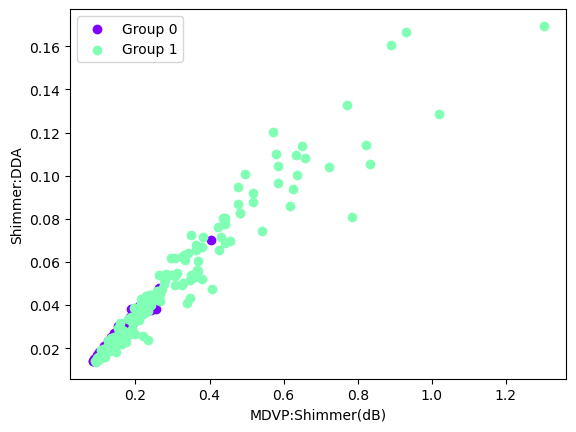

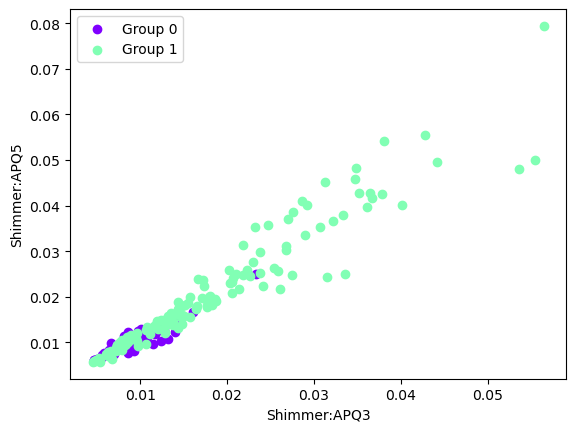

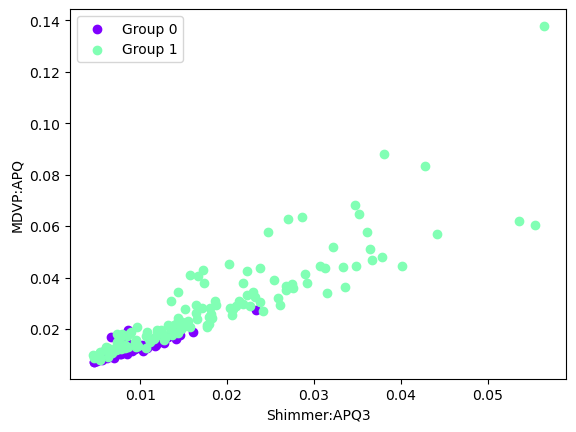

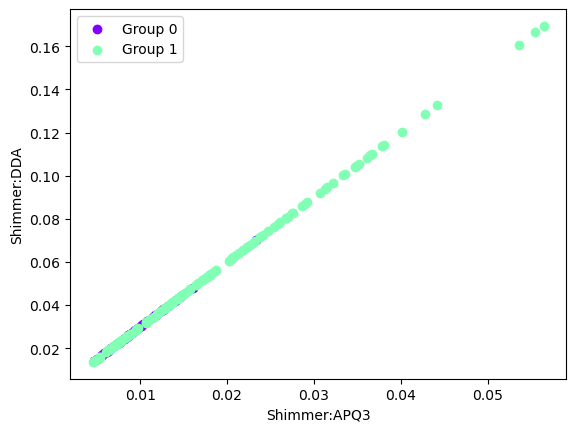

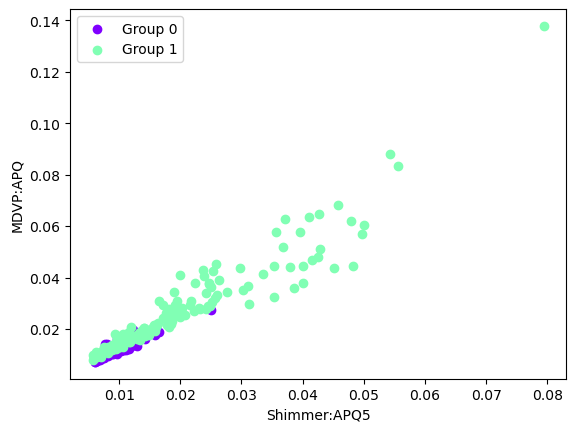

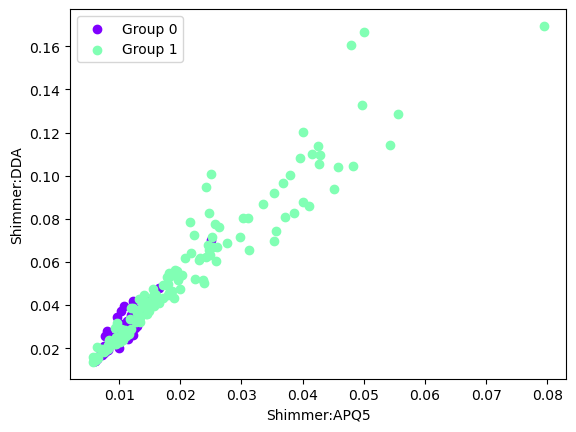

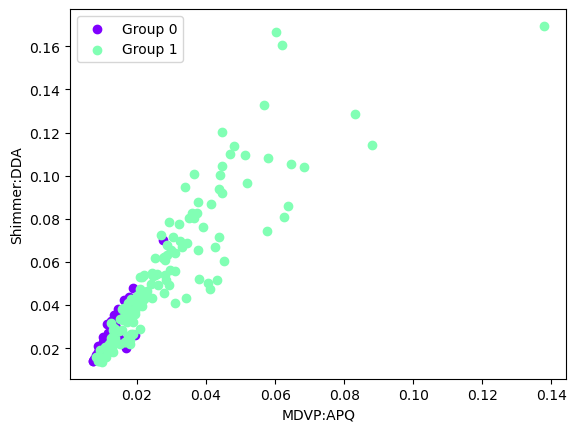

In [4]:
# Analysis of some posible correlated variables

# Select the columns related to Fundamental Frequency
fund_freq_cols = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']

# Select the columns related to Jitter
jitter_cols = ['MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP']

# Select the columns related to Shimmer
shimmer_cols = ['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA']

# Plot scatter plots for Fundamental Frequency
for i in range(len(fund_freq_cols)-1):
    for j in range(i+1, len(fund_freq_cols)):
        scat_plt(df[fund_freq_cols[i]], df[fund_freq_cols[j]], df['status'])

# Plot scatter plots for Jitter
for i in range(len(jitter_cols)-1):
    for j in range(i+1, len(jitter_cols)):
        scat_plt(df[jitter_cols[i]], df[jitter_cols[j]], df['status'])

# Plot scatter plots for Shimmer
for i in range(len(shimmer_cols)-1):
    for j in range(i+1, len(shimmer_cols)):
        scat_plt(df[shimmer_cols[i]], df[shimmer_cols[j]], df['status'])

In [5]:
# Rename the columns names
dict_names = {'MDVP:Fo(Hz)':'avFF',
              'MDVP:Fhi(Hz)':'maxFF', 
              'MDVP:Flo(Hz)':'minFF',
              'MDVP:Jitter(%)': 'percJitter',
              'MDVP:Jitter(Abs)':'absJitter' ,
              'MDVP:RAP': 'rap',
              'MDVP:PPQ': 'ppq',
              'Jitter:DDP': 'ddp',
              'MDVP:Shimmer' : 'lShimer',
              'MDVP:Shimmer(dB)': 'dbShimer',
              'Shimmer:APQ3':'apq3',
              'Shimmer:APQ5': 'apq5',
              'MDVP:APQ':'apq',
              'Shimmer:DDA':'dda'}

df_renamed = renamevars(df,dict_names)
df_renamed.head()

,name,avFF,maxFF,minFF,percJitter,absJitter,rap,ppq,ddp,lShimer,dbShimer,apq3,apq5,apq,dda,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
# Remove correlated variables
#There is high correlation between Shimmer:DDA with  Shimmer:APQ3 and  MDVP:RAP with Jitter:DDP

df_cleaned = df_renamed.drop(['rap', 'dda'], axis=1, inplace=False)

### 2. Basic EDA based on plots and descriptive statistics

In [7]:
# SUMMARIZE THE DATA AFTER CLEANING
annotation_result = anotate_stats(df_cleaned)
annotation_result

'annotation_result = anotate_stats(df_cleaned)\nannotation_result'

### 3. Aggregating and transforming variables in the dataset

In [8]:
# Split the 'name' column into segments using '_' as a separator
name_segments = df_cleaned['name'].str.split('_', expand=True)

# Extract subject_id and trial from the segments
df_cleaned['subject_id'] = name_segments[2]
df_cleaned['trial'] = 't' + name_segments[3]

df_cleaned = df_cleaned[['subject_id', 'trial'] + [col for col in df_cleaned.columns if col not in ['subject_id', 'trial']]]

# Drop the 'name' column from the DataFrame
df_cleaned.drop('name', axis=1, inplace=True)

# Display the updated DataFrame
df_cleaned.head(5)

,subject_id,trial,avFF,maxFF,minFF,percJitter,absJitter,ppq,ddp,lShimer,dbShimer,apq3,apq5,apq,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,S01,t1,119.992,157.302,74.997,0.00784,0.00007,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,S01,t2,122.400,148.650,113.819,0.00968,0.00008,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,S01,t3,116.682,131.111,111.555,0.01050,0.00009,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,S01,t4,116.676,137.871,111.366,0.00997,0.00009,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,S01,t5,116.014,141.781,110.655,0.01284,0.00011,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


GROUP AND AVERAGE:
Using the function group_and_average() create a dataframe for aggregating 
each variable of the cleaned_dataframe across trials for each subject. 
The resulting dataframe should consist on 32 observations, one for each subject.

In [9]:
df_grouped = group_and_average(df_cleaned, 'subject_id')
print(f"Number of observations: {len(df_grouped)}")
df_grouped.head()

Number of observations: 32


,subject_id,avFF,maxFF,minFF,percJitter,absJitter,ppq,ddp,lShimer,dbShimer,apq3,apq5,apq,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,S01,118.719333,141.312833,106.029833,0.010085,0.000087,0.007312,0.014992,0.053932,0.515167,0.028025,0.039770,0.037348,0.016318,20.406667,1.0,0.428488,0.821314,-4.239926,0.296836,2.342642,0.353841
1,S02,99.770333,121.894333,95.413167,0.004585,0.000050,0.002857,0.006978,0.021668,0.194333,0.011042,0.013113,0.018123,0.008917,22.997333,1.0,0.598429,0.778017,-5.420414,0.308289,2.287428,0.234019
2,S04,147.346167,216.867500,87.532333,0.004347,0.000030,0.002320,0.005285,0.019343,0.181667,0.009383,0.011003,0.018410,0.013080,23.899667,1.0,0.521660,0.645843,-5.337281,0.249288,2.360638,0.232007
3,S05,159.837667,181.630167,86.767167,0.006247,0.000040,0.003422,0.009188,0.043337,0.388167,0.020492,0.026550,0.044458,0.025608,19.058667,1.0,0.626723,0.695886,-4.560947,0.278483,2.787869,0.310658
4,S06,150.644667,208.264333,78.278333,0.005230,0.000037,0.002838,0.008173,0.021367,0.209667,0.009673,0.012625,0.020725,0.014892,24.762000,1.0,0.432724,0.719675,-6.223537,0.228296,2.440360,0.164939


### 4. Differentiating between controls (healthy subjects) and patients

Classify the DataFrame data into patients or controls
 using k-nearest neighbors with k=3. 
 Compare the outcomes across three scenarios: 
 1) utilizing cleaned and aggregated data
 2) cleaned, aggregated, and z-score normalized data
 3) the same, but normalized using the min-max option. Are there differences?

In [10]:
def k_near_neigh(df,case):
    X = df.drop(['subject_id', 'status'], axis=1, inplace=False)
    y = df['status']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

    if case == 1:
        pass
    elif case == 2:
        X_train = normalize(X_train, 0)
        X_test = normalize(X_test, 0)
    elif case == 3:
        X_train = normalize(X_train, 1)
        X_test = normalize(X_test, 1)
    
    knn = KNeighborsClassifier(n_neighbors=3)

    knn.fit(X_train, y_train)

    # Predict the target variable for the test data
    y_pred = knn.predict(X_test)

    # Calculate the accuracy of the classifier
    accuracy = knn.score(y_pred, y_test)
    print(f"Accuracy of case {case}: {accuracy}" )

In [ ]:
# case 1 cleaned and aggregated data
k_near_neigh(df_grouped, 1)

# case 2 cleaned and aggregated data and z-score normalized data
k_near_neigh(df_grouped, 2)

# case 3 cleaned and aggregated data and min-max normalized data
k_near_neigh(df_grouped, 3)